# analysis.ipynb: Analyze the data from Geant4 simulation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

SiPMCount = 2

Here data is read from a csv file, dtype is recorded as follows.

Notice that `rawData[:, SiPMNb, 0]` is the mean, and `rawData[:, SiPMNb, 1]` is the rms.

In [2]:
dtype = np.dtype([
    ("z_position", "<f8"),
    ("x_position", "<f8"),
    ("particle_nb", "<i2"),
    ("energy", "<f8"),
    ("SiPM_stat", "<f8", (SiPMCount,2)),
])

rawData_z = np.loadtxt('../data/muon_z.csv', dtype=dtype, delimiter=',')
rawData_x = np.loadtxt('../data/muon_x.csv', dtype=dtype, delimiter=',')
rawData_gamma = np.loadtxt('../data/gamma_z.csv', dtype=dtype, delimiter=',')

Plot for muon's photon count & z position relation

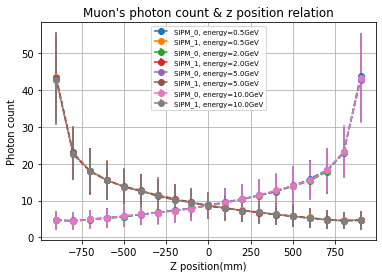

In [10]:
energyValue, indices = np.unique(rawData_z['energy'], return_index=True)

fig, ax = plt.subplots()
for energyIndex in range(energyValue.shape[0]):
    if energyIndex == energyValue.shape[0]-1:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                rawData_z['z_position'][indices[energyIndex]:],
                rawData_z['SiPM_stat'][indices[energyIndex]:, SiPMNb, 0],
                rawData_z['SiPM_stat'][indices[energyIndex]:, SiPMNb, 1],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")
    else:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                rawData_z['z_position'][indices[energyIndex]:indices[energyIndex+1]],
                rawData_z['SiPM_stat'][indices[energyIndex]:indices[energyIndex+1], SiPMNb, 0],
                rawData_z['SiPM_stat'][indices[energyIndex]:indices[energyIndex+1], SiPMNb, 1],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")

ax.set_xlabel("Z position(mm)")
ax.set_ylabel("Photon count")
ax.legend(fontsize=7)
ax.grid()
plt.title("Muon's photon count & z position relation")
plt.savefig("./figure/muon_z.png", dpi=600, bbox_inches='tight')

Plot for muon's photon count & x position relation

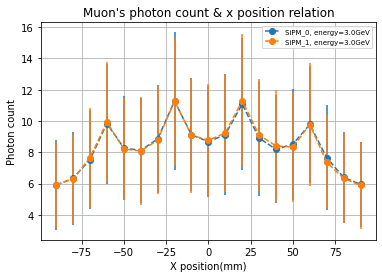

In [11]:
energyValue, indices = np.unique(rawData_x['energy'], return_index=True)

fig, ax = plt.subplots()
for energyIndex in range(energyValue.shape[0]):
    if energyIndex == energyValue.shape[0]-1:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                rawData_x['x_position'][indices[energyIndex]:],
                rawData_x['SiPM_stat'][indices[energyIndex]:, SiPMNb, 0],
                rawData_x['SiPM_stat'][indices[energyIndex]:, SiPMNb, 1],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")
    else:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                rawData_x['x_position'][indices[energyIndex]:indices[energyIndex+1]],
                rawData_x['SiPM_stat'][indices[energyIndex]:indices[energyIndex+1], SiPMNb, 0],
                rawData_x['SiPM_stat'][indices[energyIndex]:indices[energyIndex+1], SiPMNb, 1],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")

ax.set_xlabel("X position(mm)")
ax.set_ylabel("Photon count")
ax.legend(fontsize=7)
ax.grid()
plt.title("Muon's photon count & x position relation")
plt.savefig("./figure/muon_x.png", dpi=600, bbox_inches='tight')

Plot for gamma's photon count & x position relation

In [14]:
energyValue, indices = np.unique(rawData_gamma['energy'], return_index=True)

fig, ax = plt.subplots()
for energyIndex in range(energyValue.shape[0]):
    if energyIndex == energyValue.shape[0]-1:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                rawData_gamma['z_position'][indices[energyIndex]:],
                rawData_gamma['SiPM_stat'][indices[energyIndex]:, SiPMNb, 0],
                rawData_gamma['SiPM_stat'][indices[energyIndex]:, SiPMNb, 1],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]*1000}MeV")
    else:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                rawData_gamma['z_position'][indices[energyIndex]:indices[energyIndex+1]],
                rawData_gamma['SiPM_stat'][indices[energyIndex]:indices[energyIndex+1], SiPMNb, 0],
                rawData_gamma['SiPM_stat'][indices[energyIndex]:indices[energyIndex+1], SiPMNb, 1],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]*1000}MeV")
ax.set_xlabel("Z position(mm)")
ax.set_ylabel("Photon count")
#ax.set_yscale('log')
ax.legend(fontsize=7)
ax.grid()
plt.title("Gamma's photon count & z position relation")
plt.savefig("./figure/gamma_z_2MeV.png", dpi=600, bbox_inches='tight')

Now let's see the statistical properties of the photon count at one position.

In [19]:
dtype = np.dtype([
    ("z_position", "<f8"),
    ("x_position", "<f8"),
    ("energy", "<f8"),
    ("SiPM_photon_count", "<i4")
])
rawData_muon_z_0 = np.loadtxt("../data/muon_z_SiPM_0.csv", dtype=dtype, delimiter=',')
rawData_muon_x_0 = np.loadtxt("../data/muon_x_SiPM_0.csv", dtype=dtype, delimiter=',')
rawData_gamma_z_0 = np.loadtxt("../data/gamma_z_SiPM_0.csv", dtype=dtype, delimiter=',')

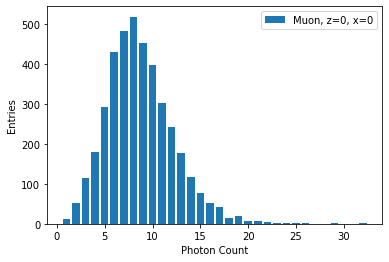

In [52]:
SiPM_photon_count_muon = rawData_muon_z_0[rawData_muon_z_0['z_position']==0]['SiPM_photon_count']
number, count = np.unique(SiPM_photon_count_muon, return_counts=True)

fig, ax = plt.subplots()
ax.bar(number, count, label='Muon, z=0, x=0')
ax.set_xlabel("Photon Count")
ax.set_ylabel("Entries")
ax.legend()
plt.savefig("./figure/muon_stat.png", dpi=600, bbox_inches='tight')

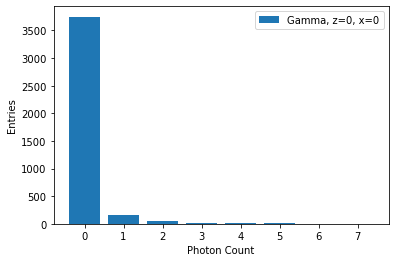

In [51]:
SiPM_photon_count_gamma = rawData_gamma_z_0[rawData_gamma_z_0['z_position']==0]['SiPM_photon_count']
number, count = np.unique(SiPM_photon_count_gamma, return_counts=True)

fig, ax = plt.subplots()
ax.bar(number, count, label='Gamma, z=0, x=0')
ax.set_xlabel("Photon Count")
ax.set_ylabel("Entries")
ax.legend()
plt.show()
plt.savefig("./figure/gamma_stat.png", dpi=600, bbox_inches='tight')